# Part 2: Penguin

In this part of the assignment you will analyze a dataset of measurements about three different species of Penguins. 

**Learning objectives.** You will:
1. Train and test a linear model using ordinary least squares regression. 
2. Use a One-Hot-Encoding to incorporate categorical features as inputs to a linear predictive model.
3. Inspect model coefficients and scatterplot visualizations to interpret a change in model coefficients for two different linear models.

We begin by importing the dataset and providing a visualization of how the numerical features vary by species. 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


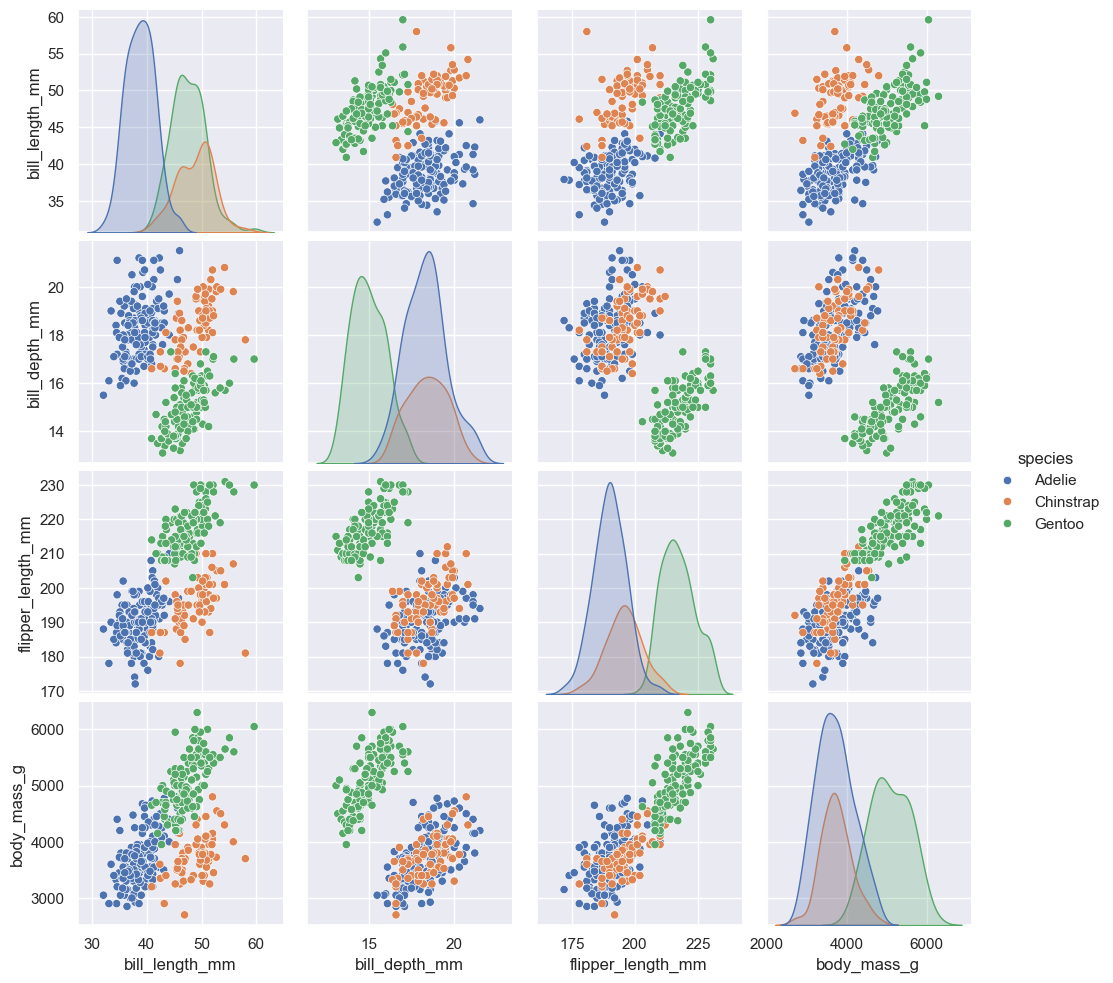

In [3]:
# Run but do not modify this code

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

# Only 11 penguins out of over 300 are missing any data;
# we simply drop those here
penguins = sns.load_dataset("penguins").dropna()
sns.pairplot(data=penguins, hue="species")
penguins.head()

## Task 1

We will build predictive models using `bill_length_mm`, `bill_depth_mm`, `species`, and `sex` as inputs and attempting to predict `flipper_length_mm`. The code below gets the appropriate columns of data and converts them to NumPy arrays for you, inputs as `X` and predictive targets as `y`.

Randomly split the input data into a [train and test partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with 30% of the data reserved for testing. Use a random seed of `2024` for reproducibility of the results.

In [17]:
X = penguins[["bill_length_mm", "bill_depth_mm", "species", "sex"]].values
y = penguins["flipper_length_mm"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3, random_state=2024)
print(X_train)

[[44.1 19.7 'Adelie' 'Male']
 [40.2 20.1 'Adelie' 'Male']
 [47.5 14.0 'Gentoo' 'Female']
 [39.2 18.6 'Adelie' 'Male']
 [36.0 17.8 'Adelie' 'Female']
 [42.9 17.6 'Adelie' 'Male']
 [39.6 20.7 'Adelie' 'Female']
 [49.2 15.2 'Gentoo' 'Male']
 [42.1 19.1 'Adelie' 'Male']
 [45.8 14.6 'Gentoo' 'Female']
 [36.8 18.5 'Adelie' 'Female']
 [45.5 17.0 'Chinstrap' 'Female']
 [45.2 17.8 'Chinstrap' 'Female']
 [39.8 19.1 'Adelie' 'Male']
 [45.3 13.7 'Gentoo' 'Female']
 [53.5 19.9 'Chinstrap' 'Male']
 [37.7 18.7 'Adelie' 'Male']
 [38.3 19.2 'Adelie' 'Male']
 [37.2 19.4 'Adelie' 'Male']
 [38.5 17.9 'Adelie' 'Female']
 [38.6 17.2 'Adelie' 'Female']
 [46.9 16.6 'Chinstrap' 'Female']
 [52.0 18.1 'Chinstrap' 'Male']
 [39.5 17.4 'Adelie' 'Female']
 [50.0 15.3 'Gentoo' 'Male']
 [47.8 15.0 'Gentoo' 'Male']
 [41.1 18.1 'Adelie' 'Male']
 [43.2 14.5 'Gentoo' 'Female']
 [41.8 19.4 'Adelie' 'Male']
 [47.2 15.5 'Gentoo' 'Female']
 [45.8 14.2 'Gentoo' 'Female']
 [35.7 18.0 'Adelie' 'Female']
 [49.5 16.1 'Gentoo' 'Mal

## Task 2

Run the following cell to zoom in on visualizing the relationship between `bill_length_mm`, `bill_depth_mm` and `flipper_length_mm`. You should observe (perhaps unsurprisingly) that penguins with larger bills tend to have longer flippers.

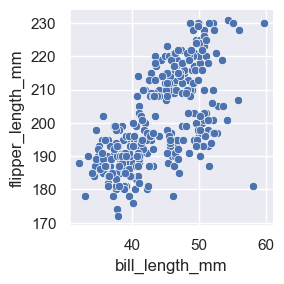

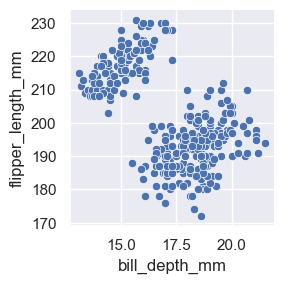

In [7]:
# Run but do not modify this code
sns.relplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", height=3)
sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", height=3)

Build a linear predictive model using [ordinary least squares regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) fit on the training data to predict `flipper_length_mm` as a function of `bill_depth_mm` and `bill_depth_mm` only (do not use `species` or `sex` for this task). Use the model to make predictions on the test data (again, without using `species` or `sex` for this task), and evaluate the [root mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error) of the predictions.

In [9]:
from sklearn.metrics import root_mean_squared_error
from sklearn import linear_model
X_newTrain=X_train[:,:2]
X_newTest=X_test[:,:2]
model1=linear_model.LinearRegression()
model1.fit(X_newTrain,y_train)
print(model1.coef_)
y_hatTrain=model1.predict(X_newTrain)
y_hatTest=model1.predict(X_newTest)
train_rmse=root_mean_squared_error(y_hatTrain,y_train)
test_rmse=root_mean_squared_error(y_hatTest,y_test)
print(f'Training error:{train_rmse}')
print(f'Test error:{test_rmse}')
               

[ 1.38602826 -3.08142116]
Training error:8.805980004773486
Test error:8.205499657598846


## Task 3

One way to improve the performance of our regression model for the `flipper_length_mm` prediction task is to include the `species` and `sex` features. That is, we now want to model/predict `flipper_length_mm` as a function of `bill_length_mm`, `bill_depth_mm`, `species`, and `sex`. However, the `species` and `sex` features are both categorical. 

Compute a [one hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) of the `species` and `sex` data, combine that with the numerical `bill_length_mm` and `bill_depth_mm` data, and fit a linear regression model using ordinary least squares regression on the training data with all of these features. Again use the model to make predictions on the test data, and evaluate the [root mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error) of the predictions.

In [25]:
from sklearn.preprocessing import OneHotEncoder
species=penguins["species"].values.reshape(-1,1)
sex=penguins["sex"].values.reshape(-1,1)
species_one_hot=OneHotEncoder(sparse_output=False).fit_transform(species)
sex_one_hot=OneHotEncoder(sparse_output=False).fit_transform(sex)
X=np.concatenate((X[:,:2],species_one_hot,sex_one_hot), axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3, random_state=2024)
model2=linear_model.LinearRegression()
model2.fit(X_train, y_train)
print(model2.coef_)
y_hatTrain=model2.predict(X_train)
y_hatTest=model2.predict(X_test)
train_rmse=root_mean_squared_error(y_hatTrain,y_train)
test_rmse=root_mean_squared_error(y_hatTest,y_test)
print(f'Training error:{train_rmse}')
print(f'Test error:{test_rmse}')

[ 0.44608943  1.33712979 -9.40536305 -8.53050497 17.93586802 -1.69364359
  1.69364359]
Training error:5.433581893630372
Test error:5.384288094570136


## Task 4

You should have observed that incorporating `species` and `sex` features improved the quality of our predictions for `flipper_length_mm`. Examine the model coefficients for the original model (not incorporating `species` or `sex`) from task 2 versus the model coefficients from the combined model in task 3. You should observe that the task 2 model has a negative coefficient for `bill_depth_mm` (meaning the model predicts penguins with deeper bills will have shorter flippers), but the task 3 model has a positive coefficient for `bill_depth_mm` (meaning the model predicts penguins with deeper bills will have longer flippers). What gives?

Run the code below to generate two visualizations. The first is a scatter plot of `bill_depth_mm` on the horizontal x-axis and `flipper_length_mm` on the vertical y-axis, with the points colored and shaped by their `sex`. The second is the same scatter plot but with the points colored and shaped by their `species`. 

Referring to the visualizations to justify your answer, explain why the model coefficient for `bill_depth_mm` changed from being negative in task 2 to positive in task 3.

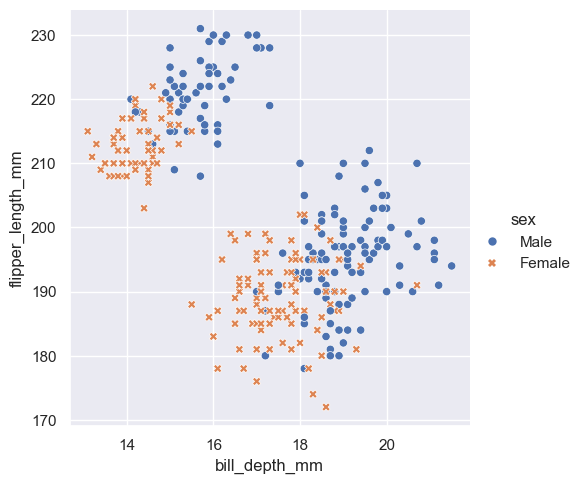

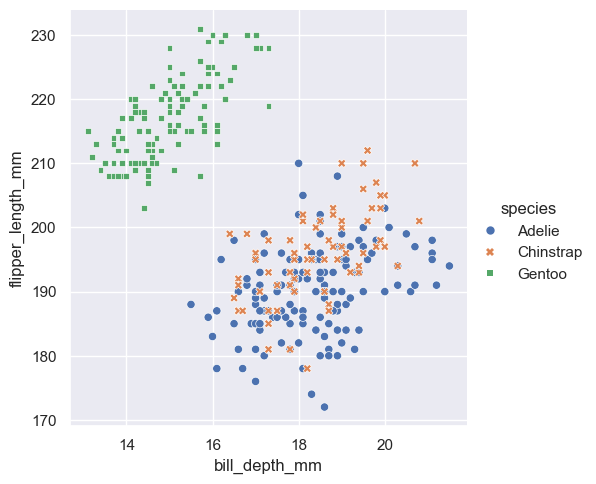

In [27]:
# Run but do not modify this code

sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", hue="sex", style="sex")
sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", hue="species", style="species")

Prior to adding the data regarding sex and species, the model was under the impression that there was simply an inverse correlation between bill depth and flipper length, resulting in the negative coefficient. When you add sex and species back, the model can gain an understanding that different species have different body sizes, as seen by the separate cluster of gentoo penguins. Moreover, within these clusters you could argue that there is a positive correltion between flipper length and bill depth, which is reflected by the positive coefficient.